In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append('../')

In [3]:
from yaml import load as yaml_load
from src.features.build_features import extract_features_classification
from src.data.make_dataset import LoadDataframe
from src.models.train_model import model_classification
import matplotlib.pyplot as plt
import joblib

Using TensorFlow backend.


In [4]:
def _load_config_file(config_file):
    """
    Load configuration file
    :param config_file: is the configuration file
    :return: configuration
    :rtype: dict
    """
    with open(config_file) as yml_config:
        return yaml_load(yml_config)

def _build_configuration(config_file):
    """
    Build the operation configuration dict
    :param config_file: is the path to the yaml config_file
    :type: string
    :return: config: global configuration
    :rtype dict
    """
    # yaml config
    config = _load_config_file(config_file)
    return config

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.figure(figsize=(15, 15))

In [5]:
config_file = "/home/ml/Documents/crimes_chigaco/config/config.yml"
config = _build_configuration(config_file)

In [6]:
%%time
obj_df_loaded = LoadDataframe(config, '2013', '2014')

CPU times: user 1.31 ms, sys: 0 ns, total: 1.31 ms
Wall time: 8.29 ms


In [7]:
%%time
df_crime_socio = obj_df_loaded.df_crime_socio()

CPU times: user 12min 53s, sys: 4.8 s, total: 12min 58s
Wall time: 13min 8s


In [8]:
df_crime_socio.sample(5)

,id,cas_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,longitude,location,community_area_name,pct_housing_crowded,pct_households_below_poverty,pct_age16_unemployed,pct_age25_no_highschool,pct_not_working_age,per_capita_income,hardship_index
269282,9391387,HW534407,2013-10-15 12:00:00,067XX N CALIFORNIA AVE,0890,THEFT,FROM BUILDING,OTHER,False,False,...,-87.699804,"(42.003646958, -87.699803586)",West Ridge,7.8,17.2,8.8,20.8,38.5,23040.0,46.0
275516,9401665,HW544427,2013-11-22 19:30:00,085XX S HOUSTON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,-87.550250,"(41.740012398, -87.550250075)",South Chicago,4.7,29.8,19.7,26.6,41.1,16579.0,75.0
247801,9355821,HW499294,2013-10-19 02:02:00,008XX W SHERIDAN RD,0850,THEFT,ATTEMPT THEFT,OTHER,False,False,...,-87.650726,"(41.952729665, -87.650726382)",Lake View,1.1,11.4,4.7,2.6,17.0,60058.0,5.0
112701,9138111,HW283544,2013-05-20 19:15:00,013XX N LAVERGNE AVE,2027,NARCOTICS,POSS: CRACK,STREET,True,False,...,-87.750943,"(41.905290728, -87.750942752)",Austin,6.3,28.6,22.6,24.4,37.9,15957.0,73.0
195552,9271320,HW415802,2013-08-20 11:58:00,064XX S WHIPPLE ST,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,...,-87.699425,"(41.776654852, -87.699424903)",Chicago Lawn,7.6,27.9,17.1,31.2,40.6,13231.0,80.0


In [9]:
df_temperature = obj_df_loaded.df_temperature()

In [10]:
df_temperature.sample(5)

,Temperature,month,day,hours
9349,285.193,10,26,1
9111,286.195,10,16,3
4260,276.850,3,28,0
5477,298.510,5,17,17
5575,303.600,5,21,19


In [11]:
df_sky = obj_df_loaded.df_sky()

In [12]:
df_sky.sample(5)

,Chicago_broken clouds,Chicago_drizzle,Chicago_dust,Chicago_few clouds,Chicago_fog,Chicago_freezing rain,Chicago_haze,Chicago_heavy intensity drizzle,Chicago_heavy intensity rain,Chicago_heavy snow,...,Chicago_thunderstorm,Chicago_thunderstorm with drizzle,Chicago_thunderstorm with heavy rain,Chicago_thunderstorm with light drizzle,Chicago_thunderstorm with light rain,Chicago_thunderstorm with rain,Chicago_very heavy rain,month,day,hours
10074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11,25,6
3829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,10,1
5798,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,31,2
8303,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,12,11
6226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,17,22


In [13]:
obj_features = extract_features_classification(config, df_crime_socio, df_temperature, df_sky)

In [14]:
df_ml = obj_features.extract_feature()

In [15]:
df_ml[0].sample(5)

,community_area_number,x_coordinate,y_coordinate,latitude,longitude,pct_housing_crowded,pct_households_below_poverty,pct_age16_unemployed,pct_age25_no_highschool,pct_not_working_age,...,Chicago_smoke,Chicago_snow,Chicago_squalls,Chicago_thunderstorm,Chicago_thunderstorm with drizzle,Chicago_thunderstorm with heavy rain,Chicago_thunderstorm with light drizzle,Chicago_thunderstorm with light rain,Chicago_thunderstorm with rain,Chicago_very heavy rain
60815,27.0,1156710.0,1899877.0,41.881039,-87.700032,8.2,42.4,19.6,21.3,43.2,...,0,0,0,0,0,0,0,0,0,0
186456,25.0,1145011.0,1910225.0,41.909664,-87.742729,6.3,28.6,22.6,24.4,37.9,...,0,0,0,0,0,0,0,0,0,0
99173,1.0,1163498.0,1943889.0,42.001670,-87.673864,7.7,23.6,8.7,18.2,27.5,...,0,0,0,0,0,0,0,0,0,0
84313,44.0,1183628.0,1851929.0,41.748879,-87.602689,3.3,27.8,24.0,14.5,40.3,...,0,0,0,0,0,0,0,0,0,0
92880,7.0,1167095.0,1916066.0,41.925246,-87.661433,0.8,12.3,5.1,3.6,21.5,...,0,0,0,0,0,0,0,0,0,0


In [16]:
obj_model = model_classification(config, df_ml)

In [23]:
list_data = obj_model.load_for_ml()
X_train = list_data[0]
x_test = list_data[1]
y_train = list_data[2] 
y_test = list_data[3]
class_names = list_data[4]

In [17]:
class_names

['ASSAULT', 'BATTERY', 'BURGLARY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'THEFT']

In [77]:
model_xgboost = obj_model.train_xgboost()

[14:09:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1014 extra nodes, 392 pruned nodes, max_depth=10
[14:10:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 824 extra nodes, 136 pruned nodes, max_depth=10
[14:12:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 838 extra nodes, 212 pruned nodes, max_depth=10
[14:13:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1220 extra nodes, 312 pruned nodes, max_depth=10
[14:14:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 722 extra nodes, 202 pruned nodes, max_depth=10
[14:15:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 958 extra nodes, 276 pruned nodes, max_depth=10
[14:16:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1068 extra nodes, 374 pruned nodes, max_depth=10
[14:18:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 836 extra nodes, 130 pruned n

[15:30:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1206 extra nodes, 330 pruned nodes, max_depth=10
[15:32:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1036 extra nodes, 382 pruned nodes, max_depth=10
[15:33:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1266 extra nodes, 360 pruned nodes, max_depth=10
[15:34:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 872 extra nodes, 292 pruned nodes, max_depth=10
[15:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1202 extra nodes, 328 pruned nodes, max_depth=10
[15:37:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 698 extra nodes, 200 pruned nodes, max_depth=10
[15:38:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1256 extra nodes, 358 pruned nodes, max_depth=10
[15:39:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1054 extra nodes, 470 prune

[16:49:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 734 extra nodes, 158 pruned nodes, max_depth=10
[16:50:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1184 extra nodes, 368 pruned nodes, max_depth=10
[16:52:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1002 extra nodes, 406 pruned nodes, max_depth=10
[16:53:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1118 extra nodes, 424 pruned nodes, max_depth=10
[16:54:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 852 extra nodes, 282 pruned nodes, max_depth=10
[16:55:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1200 extra nodes, 306 pruned nodes, max_depth=10
[16:57:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 706 extra nodes, 208 pruned nodes, max_depth=10
[16:58:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1224 extra nodes, 340 pruned

[18:05:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1020 extra nodes, 356 pruned nodes, max_depth=10
[18:06:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 736 extra nodes, 222 pruned nodes, max_depth=10
[18:07:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1118 extra nodes, 354 pruned nodes, max_depth=10
[18:08:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 996 extra nodes, 354 pruned nodes, max_depth=10
[18:09:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 992 extra nodes, 404 pruned nodes, max_depth=10
[18:10:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 804 extra nodes, 292 pruned nodes, max_depth=10
[18:11:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1084 extra nodes, 330 pruned nodes, max_depth=10
[18:12:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 730 extra nodes, 222 pruned n

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

In [53]:
preds = model_xgboost.predict(obj_model.dtest())

In [54]:
print(precision_score(y_test, preds, average='macro'))

0.38017016616049987


/home/ml/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
print(accuracy_score(y_test, preds))

0.5101599081190918


Confusion matrix, without normalization
[[    0  1551    43    37  1289  2509]
 [    0  8742    62   116  2565  4577]
 [    0   228   177    55   574  4394]
 [    0  1561    90   167  1351  6237]
 [    0   331    23    73  7407  2401]
 [    0  1038   108    80  1974 18154]]
Normalized confusion matrix
[[0.   0.29 0.01 0.01 0.24 0.46]
 [0.   0.54 0.   0.01 0.16 0.28]
 [0.   0.04 0.03 0.01 0.11 0.81]
 [0.   0.17 0.01 0.02 0.14 0.66]
 [0.   0.03 0.   0.01 0.72 0.23]
 [0.   0.05 0.01 0.   0.09 0.85]]


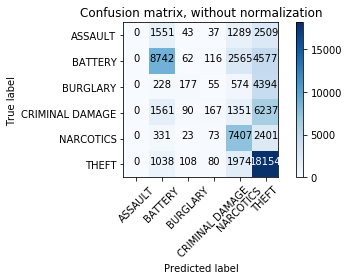

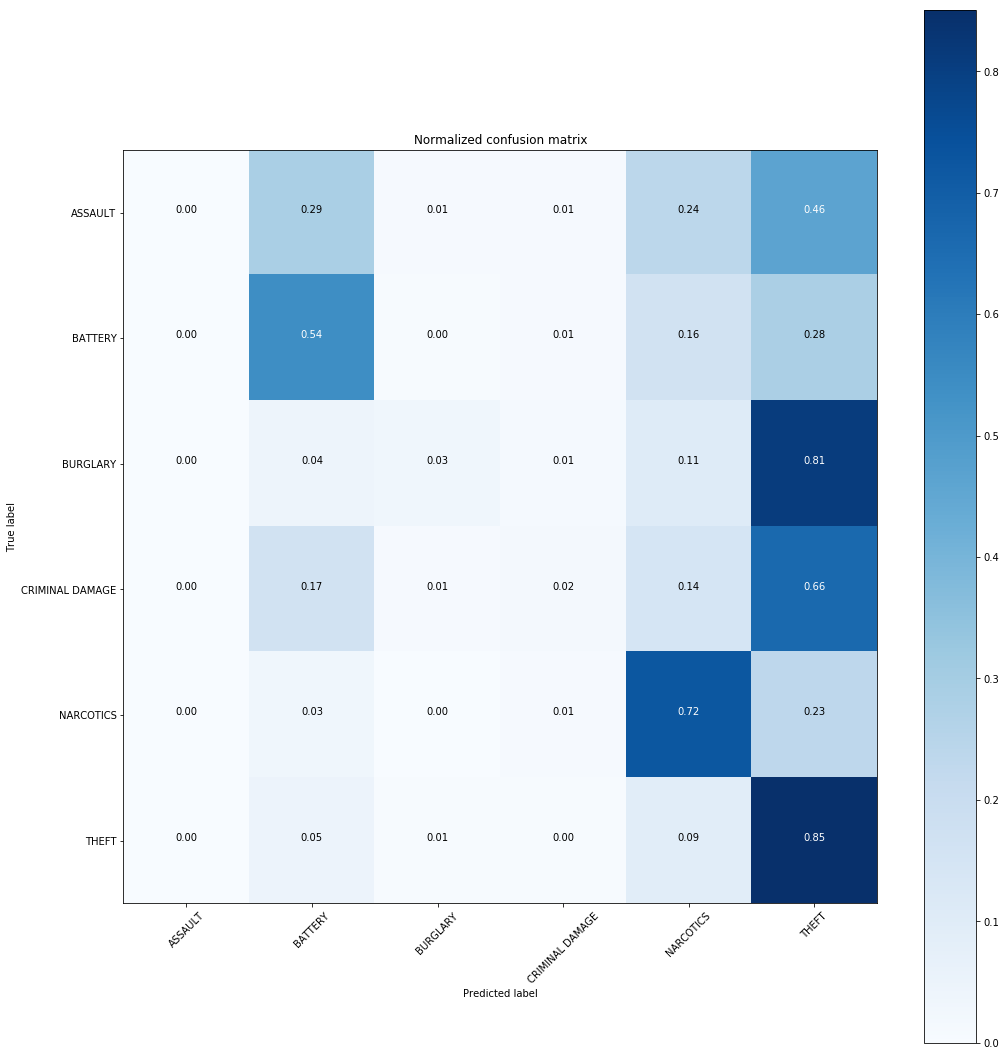

<Figure size 1080x1080 with 0 Axes>

In [57]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, preds) 
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figsize = (10, 10)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figsize = (10, 10)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

###  Save model

In [79]:
filename = '/home/ml/Documents/crimes_chigaco/models/model_xgboost_2013_2015.sav'

In [80]:
joblib.dump(model_xgboost,filename) 

['/home/ml/Documents/crimes_chigaco/models/model_xgboost_2013_2015.sav']

In [81]:
loaded_model = joblib.load(filename)

In [61]:
pred_test = loaded_model.predict(obj_model.dtest())

In [63]:
len(pred_test)

67914

In [64]:
len(y_test)

67914

### Implémentation du SVM

In [59]:
for_ml = obj_model.load_for_ml()

In [60]:
X_train = for_ml[0].astype(float)

In [61]:
y_train = for_ml[2].astype(float)

In [62]:
X_train.shape

(158357, 68)

In [63]:
y_train.shape

(158357,)

In [ ]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train.values, y_train.values)

### Implementation de random forest

In [57]:
import numpy as np
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

In [62]:
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [63]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

In [64]:
n_iter_search = 5
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search, cv=5)

In [65]:
%%time
random_search.fit(X_train, y_train)

CPU times: user 8min 56s, sys: 1.99 s, total: 8min 58s
Wall time: 9min 19s


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=5, n_jobs=None,
          param_distributions={'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1221305ba8>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f121c8c6668>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [66]:
clf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

In [67]:
random_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 8,
 'min_samples_split': 2}

In [68]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [69]:
rf_best = random_search.best_estimator_

In [70]:
preds = rf_best.predict(x_test)

In [71]:
print(accuracy_score(y_test, preds))

0.5124948429303943


Confusion matrix, without normalization
[[  120  1944   115   278   997  1994]
 [  169  9536   150   573  2040  3793]
 [   45   378   554   452   506  3381]
 [   90  1678   329  1130  1157  4848]
 [   88   816    95   321  6982  2036]
 [  118  1560   442  1017  1676 16460]]
Normalized confusion matrix
[[0.02 0.36 0.02 0.05 0.18 0.37]
 [0.01 0.59 0.01 0.04 0.13 0.23]
 [0.01 0.07 0.1  0.09 0.1  0.64]
 [0.01 0.18 0.04 0.12 0.13 0.53]
 [0.01 0.08 0.01 0.03 0.68 0.2 ]
 [0.01 0.07 0.02 0.05 0.08 0.77]]


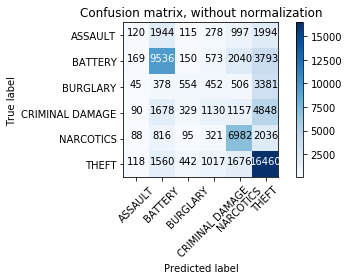

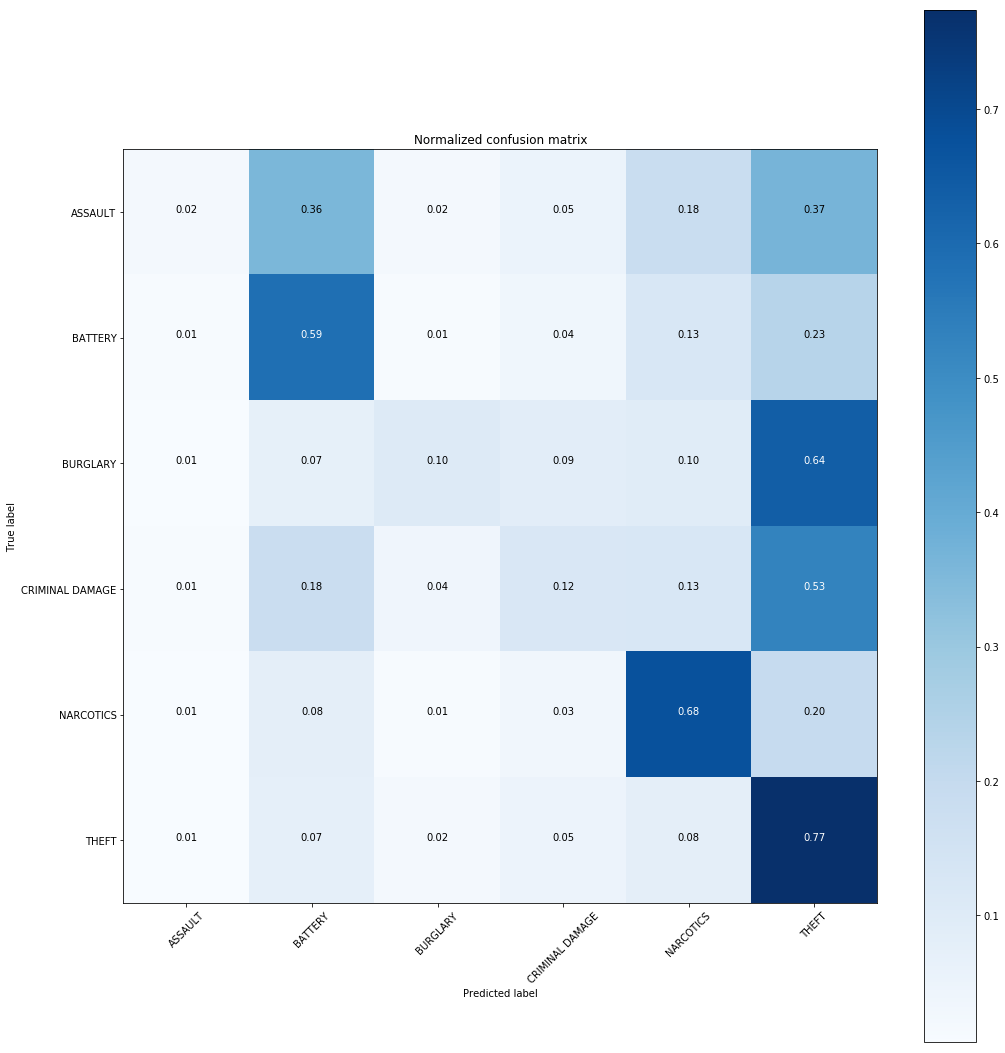

<Figure size 1080x1080 with 0 Axes>

In [72]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, preds) 
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figsize = (10, 10)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figsize = (10, 10)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')